In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from collections import Counter

import math
import random

In [0]:
pointsAmount = 200
bounds = [[1,1], [5,4]]

random_state = 5

##Create data

In [0]:
random.seed(random_state)

def get_xy():
  X = []
  Y = []
  for x in range(pointsAmount):
    x_pos = random.uniform(bounds[0][0], bounds[1][0])
    y_pos = random.uniform(bounds[0][1], bounds[1][1])
    X.append([x_pos,y_pos])
    Y.append(str(math.trunc(x_pos))+ " " +str(math.trunc(y_pos)))
  return np.array(X), np.array(Y)

In [0]:
X_input, Y_input = get_xy()
# X_train = X_input
# y_train = Y_input
X_train, X_test, y_train, y_test = train_test_split(X_input, Y_input, test_size=0.33, random_state=random_state)

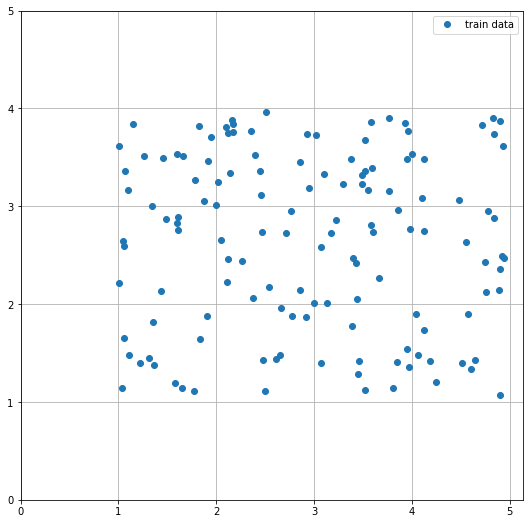

In [0]:
D_train_X = []
D_train_Y = []
for i in X_train:
 D_train_X.append(i[0]);
 D_train_Y.append(i[1]);

# D_test_X = []
# D_test_Y = []
# for i in X_test:
#  D_test_X.append(i[0]);
#  D_test_Y.append(i[1]);

plt.figure(figsize=(9,9))
# plt.plot(D_train_X, D_train_Y, 'o', D_test_X, D_test_Y, 'o')
# plt.legend(['train data', 'test data'], loc='best')

plt.plot(D_train_X, D_train_Y, 'o')
plt.legend(['train data'], loc='best')

plt.grid()

xxx = min(bounds[0][0]-1, bounds[0][1]-1);
yyy = max(bounds[1][0]+1, bounds[1][1]+1);

plt.xticks(np.arange(xxx,yyy))
plt.yticks(np.arange(xxx,yyy))

plt.show()

##KNN

In [0]:
def euclidean_distance(point1, point2):
    sum_squared_distance = 0
    for i in range(len(point1)):
        sum_squared_distance += math.pow(point1[i] - point2[i], 2)
    return math.sqrt(sum_squared_distance)

In [0]:
def mode(labels):
    return Counter(labels).most_common(1)[0][0]

In [0]:
from scipy import stats
def knn(data, labels, query, k, distance_fn, choice_fn):
    neighbor_distances_and_indices = []
    
    for index, example in enumerate(data):
        distance = distance_fn(example, query)
        neighbor_distances_and_indices.append((distance, index))
    
    sorted_neighbor_distances_and_indices = sorted(neighbor_distances_and_indices)
    
    k_nearest_distances_and_indices = sorted_neighbor_distances_and_indices[:k]
    
    k_nearest_labels = [x[1] for x in k_nearest_distances_and_indices]

    # print("---Lables", labels[k_nearest_labels])
    # print("old mode", choice_fn(labels[k_nearest_labels]))
    # print("new mode", stats.mode(labels[k_nearest_labels])[0])

    return k_nearest_distances_and_indices, labels[k_nearest_labels] , choice_fn(labels[k_nearest_labels])

Failed point: [2.77387054 1.8793093 ]
['2 1' '2 1' '2 2' '2 2' '2 2']
2 2
Failed point: [4.06290181 1.47881264]
['3 1' '4 1' '3 1' '3 1' '4 1']
3 1
Failed point: [4.47964501 3.06501087]
['4 2' '4 3' '4 2' '4 2' '4 2']
4 2
Failed point: [2.00276915 3.01492877]
['1 3' '2 3' '1 3' '2 3' '2 2']
1 3
Failed point: [3.38323991 1.77947396]
['3 2' '3 2' '3 1' '2 2' '2 1']
3 2
Failed point: [2.9972898  2.01543628]
['3 2' '2 1' '2 2' '2 1' '2 1']
2 1
Failed point: [2.92751625 3.73514594]
['3 3' '2 3' '3 3' '2 3' '3 3']
3 3
Failed point: [2.95263599 3.18851506]
['3 3' '2 3' '2 2' '3 3' '3 2']
3 3
Failed point: [1.34097342 3.00385965]
['1 2' '1 2' '1 3' '1 2' '1 2']
1 2
Failed point: [2.01676103 3.25173584]
['2 3' '1 3' '1 3' '2 3' '1 3']
1 3
Failed point: [4.12148651 2.7425359 ]
['3 2' '4 3' '3 2' '4 2' '4 3']
3 2
Failed point: [1.95138564 3.70954697]
['2 3' '2 3' '1 3' '2 3' '1 3']
2 3
Failed point: [1.87615266 3.0578717 ]
['2 3' '1 3' '2 3' '1 2' '1 2']
2 3
Failed point: [1.81911806 3.822928  ]


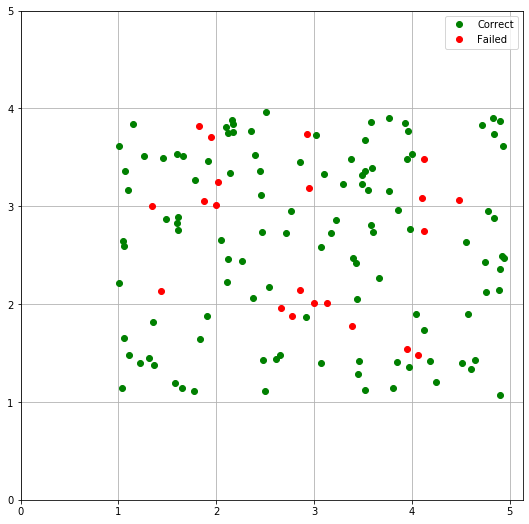

In [0]:
correct = []
failed = []
for index, example in enumerate(X_train):
  X_curr_train = np.delete(X_train, index, 0)
  y_curr_train = np.delete(y_train, index, 0)
  clf_k_nearest_neighbors, clf_labels, clf_prediction = knn(X_curr_train, y_curr_train, example, k=5, distance_fn=euclidean_distance, choice_fn=mode)
  if (clf_prediction == y_train[index]):
    correct.append(example)
  else:
    print("Failed point:", example)
    print(clf_labels)
    print(clf_prediction)
    failed.append(example)

correct_X = []
correct_Y = []
for i in correct:
 correct_X.append(i[0]);
 correct_Y.append(i[1]);

failed_X = []
failed_Y = []
for i in failed:
 failed_X.append(i[0]);
 failed_Y.append(i[1]);

accuracy = len(correct) / (len(correct) + len(failed))
print("Accuracy:", accuracy)


plt.figure(figsize=(9,9))
plt.plot(correct_X, correct_Y, 'g o', failed_X, failed_Y, 'r o')
plt.legend(['Correct', 'Failed'], loc='best')

plt.grid()

xxx = min(bounds[0][0]-1, bounds[0][1]-1);
yyy = max(bounds[1][0]+1, bounds[1][1]+1);

plt.xticks(np.arange(xxx,yyy))
plt.yticks(np.arange(xxx,yyy))

plt.show()

In [0]:
def find_best_k(X_train, y_train, displayPlot):
  k_list = np.arange(1, len(X_train)-1, 1)
  accuracy_list = []
  for n in k_list:
    correct = []
    failed = []
    for index, example in enumerate(X_train):
      X_curr_train = np.delete(X_train, index, 0)
      y_curr_train = np.delete(y_train, index, 0)
      clf_k_nearest_neighbors, clf_labels, clf_prediction = knn(X_curr_train, y_curr_train, example, k=n, distance_fn=euclidean_distance, choice_fn=mode)
      if (clf_prediction == y_train[index]):
        correct.append(example)
      else:
       failed.append(example)

    correct_X = []
    correct_Y = []
    for i in correct:
     correct_X.append(i[0]);
     correct_Y.append(i[1]);

    failed_X = []
    failed_Y = []
    for i in failed:
     failed_X.append(i[0]);
     failed_Y.append(i[1]);

    accuracy = len(correct_X) / (len(correct_X) + len(failed_Y))
    accuracy_list.append(accuracy)

    if(displayPlot):
      print("---k:", n)
      print("Accuracy:", accuracy)

      plt.figure(figsize=(9,9))
      plt.plot(correct_X, correct_Y, 'g o', failed_X, failed_Y, 'r o')
      plt.legend(['Correct', 'Failed'], loc='best')

      plt.grid()

      xxx = min(bounds[0][0]-1, bounds[0][1]-1);
      yyy = max(bounds[1][0]+1, bounds[1][1]+1);

      plt.xticks(np.arange(xxx,yyy))
      plt.yticks(np.arange(xxx,yyy))

      plt.show()

  plt.figure(figsize=(23,10))
  plt.bar(k_list, accuracy_list)
  plt.xticks(k_list)
  plt.yticks(accuracy_list)
  plt.show()
  
  return k_list[accuracy_list.index(max(accuracy_list))], max(accuracy_list)


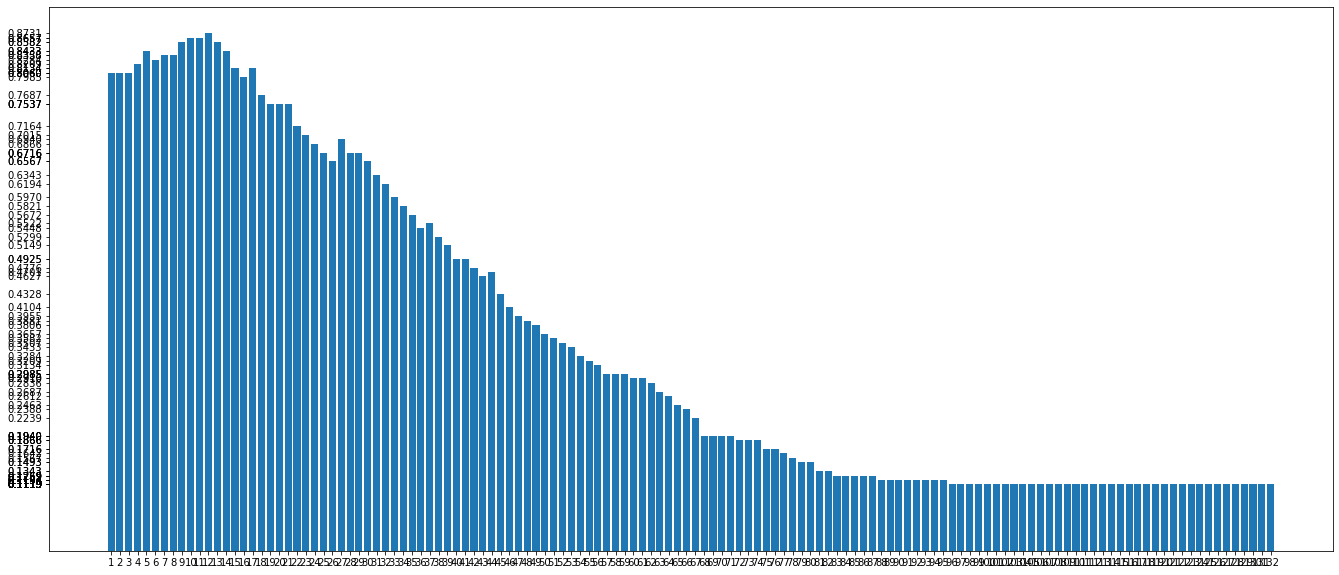

Best k and accuracy: (12, 0.8731343283582089)


In [0]:
print("Best k and accuracy:", find_best_k(X_train, y_train, displayPlot=False))

##Parzen window

In [0]:
def parzen(data, labels, query, h, distance_fn, parzen_kernel):
    uniq_labels = np.unique(labels)
    uniq_labels_values = [0] * len(uniq_labels)    

    for index, example in enumerate(data):
      distance = distance_fn(example, query)

      i = np.where(uniq_labels == labels[index])[0][0]
      uniq_labels_values[i] += parzen_kernel(distance, h)

    # print(uniq_labels)
    # print(uniq_labels_values)
    max_val = 0
    res_index = 0
    for index, example in enumerate(uniq_labels_values):
      if(max_val < example):
        max_val = example
        res_index = index

    return uniq_labels[res_index]

In [0]:
def showFunc(f):
  x = np.linspace(-2, 2, num=1000)
  y = [f(x, 1) for x in x];
  plt.plot(x, y, '-',)
  plt.show()

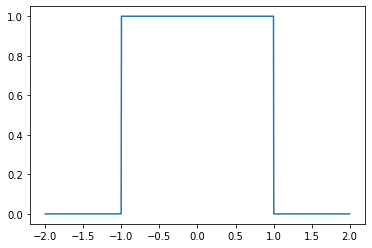

In [0]:
def tophat(val, h):
  if(abs(val) <= h):
    return h
  else:
    return 0

showFunc(tophat)

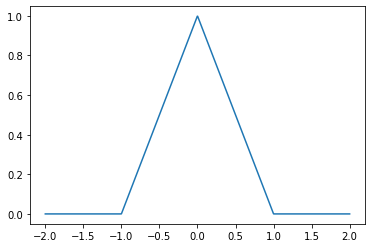

In [0]:
def T(val, h):
  if(abs(val) <= h):
    return h-abs(val)
  else:
    return 0

showFunc(T)

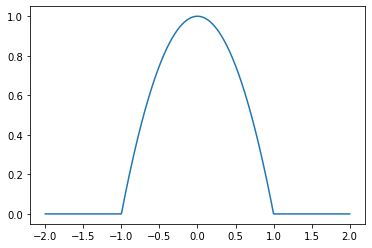

In [0]:
def E(val, h):
  if(abs(val) <= h):
    return h-(val**2)
  else:
    return 0

showFunc(E)

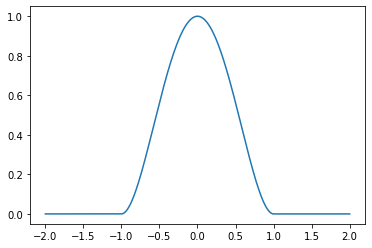

In [0]:
def Q(val, h):
  if(abs(val) <= h):
    return (h-(val**2))**2
  else:
    return 0
    
showFunc(Q)

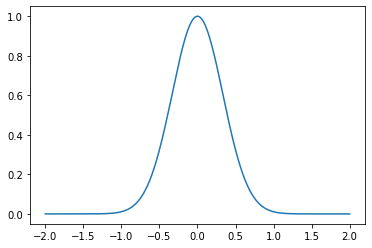

In [0]:
import sys
e = sys.float_info.epsilon

def G(x, h):
  c = h/2
  return e**((x**2)/2*c**2)

showFunc(G)

In [0]:
def find_best_h(X_train, y_train, displayPlot, parzen_kernel):  
  max_len = euclidean_distance(bounds[0], bounds[1])
  step = 0.1

  n_list = np.arange(step, max_len, step)
  accuracy_list = []
  for n in n_list:
    correct = []
    failed = []
    for index, example in enumerate(X_train):
      X_curr_train = np.delete(X_train, index, 0)
      y_curr_train = np.delete(y_train, index, 0)
      clf_prediction = parzen(X_curr_train, y_curr_train, example, h=n, distance_fn=euclidean_distance, parzen_kernel=parzen_kernel)
      if (clf_prediction == y_train[index]):
        correct.append(example)
      else:
       failed.append(example)

    correct_X = []
    correct_Y = []
    for i in correct:
     correct_X.append(i[0]);
     correct_Y.append(i[1]);

    failed_X = []
    failed_Y = []
    for i in failed:
     failed_X.append(i[0]);
     failed_Y.append(i[1]);

    accuracy = len(correct_X) / (len(correct_X) + len(failed_Y))
    accuracy_list.append(accuracy)

    if(displayPlot):
      print("---k:", n)
      print("Accuracy:", accuracy)

      plt.figure(figsize=(9,9))
      plt.plot(correct_X, correct_Y, 'g o', failed_X, failed_Y, 'r o')
      plt.legend(['Correct', 'Failed'], loc='best')

      plt.grid()

      xxx = min(bounds[0][0]-1, bounds[0][1]-1);
      yyy = max(bounds[1][0]+1, bounds[1][1]+1);

      plt.xticks(np.arange(xxx,yyy))
      plt.yticks(np.arange(xxx,yyy))

      plt.show()

  plt.figure(figsize=(23,10))
  plt.bar(n_list, accuracy_list)
  plt.xticks(n_list)
  plt.yticks(accuracy_list)
  plt.show()
  
  return n_list[accuracy_list.index(max(accuracy_list))], max(accuracy_list)

In [0]:
# print("Best h and accuracy:", find_best_h(X_train, y_train, displayPlot=False, parzen_kernel=tophat))

In [0]:
# print("Best h and accuracy:", find_best_h(X_train, y_train, displayPlot=False, parzen_kernel=T))

In [0]:
# print("Best h and accuracy:", find_best_h(X_train, y_train, displayPlot=False, parzen_kernel=E))

In [0]:
# print("Best h and accuracy:", find_best_h(X_train, y_train, displayPlot=False, parzen_kernel=Q))

In [0]:
# print("Best h and accuracy:", find_best_h(X_train, y_train, displayPlot=False, parzen_kernel=G))

##Test

In [0]:
from scipy import stats
def sumDistancesArr1(data, labels, h):
    lengthArr = []
    
    for index, point in enumerate(data):
      sumLength = 0
      for i, neighbor in enumerate(data):
        if(labels[i] == labels[index]):
          distance = euclidean_distance(point, neighbor)
          
          sumLength += tophat(distance, h)
      lengthArr.append(sumLength)

    return lengthArr

In [0]:
def getGoodData1(data, labels, lengthArr):
  uniq_labels = np.unique(labels)
  res = []
  # print("uniq_labels", uniq_labels)
  for label in uniq_labels:
    # print("label:", label)
    classPointIndexesLengthList =  []
    for index, point in enumerate(data):
      if(labels[index] == label):
        classPointIndexesLengthList.append((lengthArr[index], index))
    # print("classPointIndexesLengthList:", classPointIndexesLengthList);
    sorted_classPointIndexesLengthList = sorted(classPointIndexesLengthList)
    # print(sorted_classPointIndexesLengthList)
    final_points_and_length = sorted_classPointIndexesLengthList[-int(len(sorted_classPointIndexesLengthList) * 0.8): ]
    # print(final_points_and_length)
    final_indexes = [x[1] for x in final_points_and_length]
    res += final_indexes
  return res


final_points_indexes1 = getGoodData1(X_train, y_train, sumDistancesArr1(X_train, y_train, 0.5))

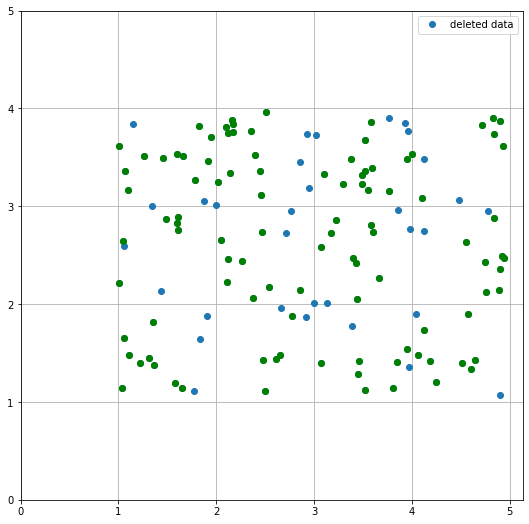

In [0]:
D_train_X = []
D_train_Y = []
for i in X_train:
 D_train_X.append(i[0]);
 D_train_Y.append(i[1]);

F_X1 = []
F_Y1 = []
for i in final_points_indexes1:
 F_X1.append(X_train[i][0]);
 F_Y1.append(X_train[i][1]);

plt.figure(figsize=(9,9))

plt.plot(D_train_X, D_train_Y, 'o', F_X1, F_Y1, 'go')
plt.legend(['deleted data'], loc='best')

plt.grid()

xxx = min(bounds[0][0]-1, bounds[0][1]-1);
yyy = max(bounds[1][0]+1, bounds[1][1]+1);

plt.xticks(np.arange(xxx,yyy))
plt.yticks(np.arange(xxx,yyy))

plt.show()

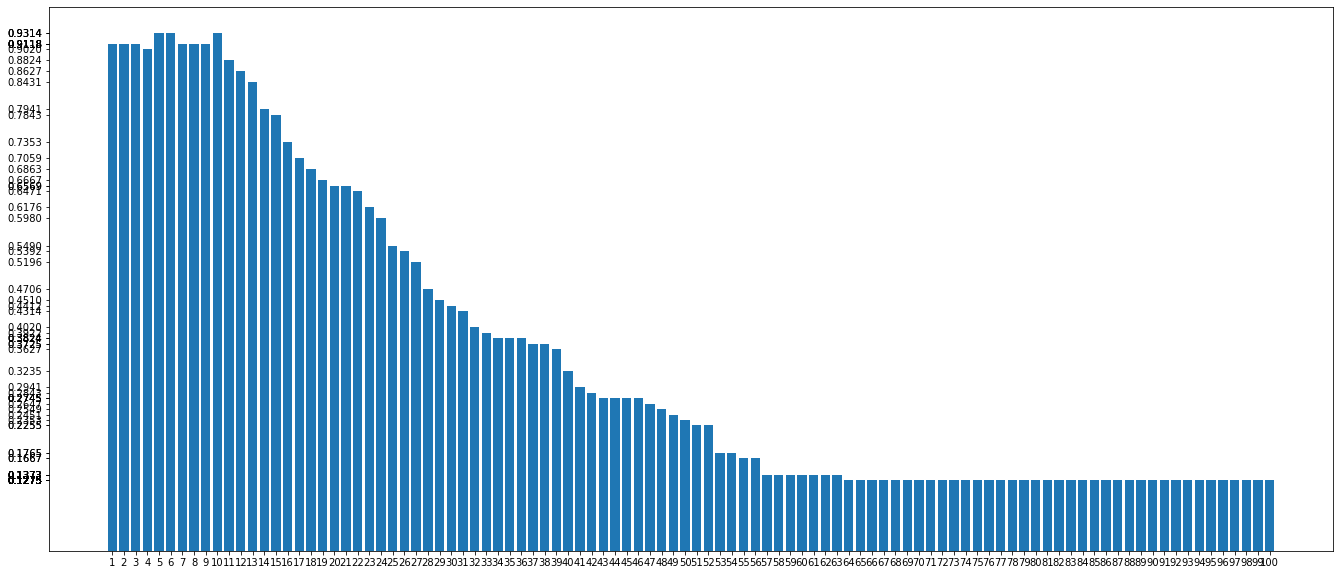

Best k and accuracy: (5, 0.9313725490196079)


In [0]:
print("Best k and accuracy:", find_best_k(X_train[final_points_indexes1], y_train[final_points_indexes1], displayPlot=False))

In [0]:
from scipy import stats
def sumDistancesArr(data, labels):
    lengthArr = []
    
    for index, point in enumerate(data):
      sumLength = 0
      for i, neighbor in enumerate(data):
        if(labels[i] == labels[index]):
          sumLength += euclidean_distance(point, neighbor)
      lengthArr.append(sumLength)

    

    return lengthArr

In [0]:
def getGoodData(data, labels, lengthArr):
  uniq_labels = np.unique(labels)
  res = []
  # print("uniq_labels", uniq_labels)
  for label in uniq_labels:
    # print("label:", label)
    classPointIndexesLengthList =  []
    for index, point in enumerate(data):
      if(labels[index] == label):
        classPointIndexesLengthList.append((lengthArr[index], index))
    # print("classPointIndexesLengthList:", classPointIndexesLengthList);
    sorted_classPointIndexesLengthList = sorted(classPointIndexesLengthList)
    # print(sorted_classPointIndexesLengthList)
    final_points_and_length = sorted_classPointIndexesLengthList[:int(len(sorted_classPointIndexesLengthList) * 0.8)]
    # print(final_points_and_length)
    final_indexes = [x[1] for x in final_points_and_length]
    res += final_indexes
  return res


final_points_indexes = getGoodData(X_train, y_train, sumDistancesArr(X_train, y_train))

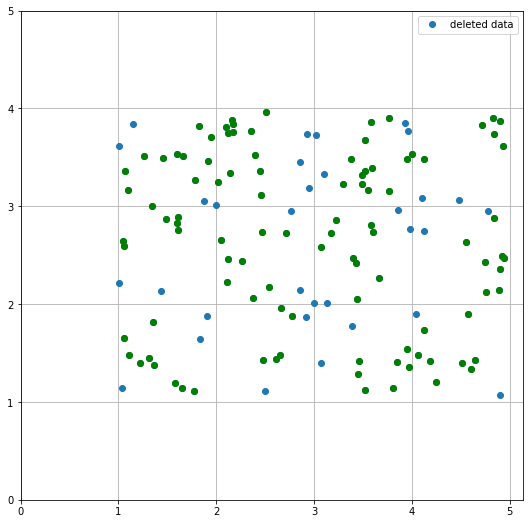

In [0]:
D_train_X = []
D_train_Y = []
for i in X_train:
 D_train_X.append(i[0]);
 D_train_Y.append(i[1]);

F_X = []
F_Y = []
for i in final_points_indexes:
 F_X.append(X_train[i][0]);
 F_Y.append(X_train[i][1]);

plt.figure(figsize=(9,9))

plt.plot(D_train_X, D_train_Y, 'o', F_X, F_Y, 'go')
plt.legend(['deleted data'], loc='best')

plt.grid()

xxx = min(bounds[0][0]-1, bounds[0][1]-1);
yyy = max(bounds[1][0]+1, bounds[1][1]+1);

plt.xticks(np.arange(xxx,yyy))
plt.yticks(np.arange(xxx,yyy))

plt.show()

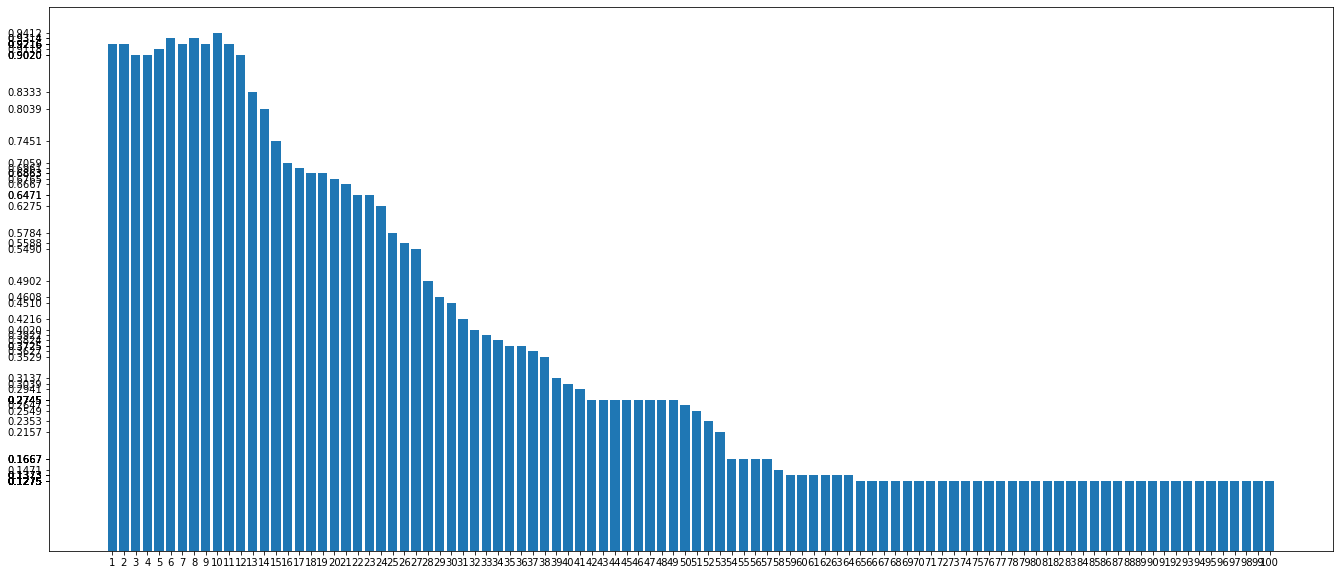

Best k and accuracy: (10, 0.9411764705882353)


In [0]:
print("Best k and accuracy:", find_best_k(X_train[final_points_indexes], y_train[final_points_indexes], displayPlot=False))